# Tarefa

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import scipy.stats       as stats

from statsmodels.stats.weightstats import ttest_ind

In [2]:
pg = sns.load_dataset('penguins')

In [3]:
pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


<AxesSubplot:xlabel='sex', ylabel='body_mass_g'>

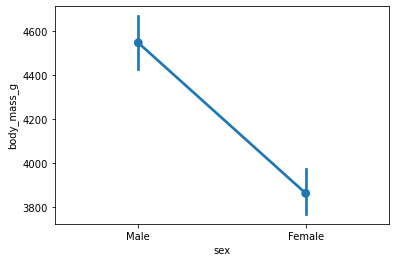

In [4]:
sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

In [5]:
# Definição das hipóteses nula e alternativa
print('''
Hipótese nula       H0: Peso dos machos <= Peso das fêmeas
Hipótese alterativa H1: Peso dos machos >  Peso das fêmeas''')

# Machos
male = pg.loc[pg.sex == 'Male', 'body_mass_g'] # Amostras de peso dos machos
n_male = len(male) # Tamanho das amostras
mean_male = np.mean(male) # Média
std_male = np.std(male, ddof=1) # Desvio padrão

# Fêmeas
female = pg.loc[pg.sex == 'Female', 'body_mass_g'] # Amostras de peso das fêmeas
n_female = len(female) # Tamanho das amostras
mean_female = np.mean(female) # Média
std_female = np.std(female, ddof=1) # Desvio padrão

# Diferença entre as médias
mean_difference = mean_male - mean_female

# Erro padrão
std_error = np.sqrt((std_male**2/n_male) + (std_female**2/n_female))

# Estatística t
t_statistic = mean_difference / std_error

# Graus de liberdade
df = n_male+n_female-2

# Valor crítico do teste t para um intervalo de confiança de 95%
alpha = 0.05
t_critical = stats.t.ppf(q=1-alpha, df=df, loc=0, scale=1) # q=95%

# Valor-p para o teste t unilateral à direita
p_value = 1-stats.t.cdf(x=t_statistic, df=df)

# Apresentação dos resultados
print(f'''
Resultados:

Diferença entre as médias: {mean_difference:.2f}
Desvio padrão (Macho): {std_male:.2f}
Desvio padrão (Fêmea): {std_female:.2f}
Erro padrão: {std_error:.2f}
Estatística do teste: {t_statistic:.2f}
Graus de liberdade: {df}
Região crítica: {t_critical:.2f}
P-value: {p_value} ({p_value:.18f})
''')

# Interpretação dos resultados
if t_statistic > t_critical:
    print("Estatística do teste > Região crítica")
else:
    print("Estatística do teste < Região crítica")
    
if p_value < 0.05:
    print("P-value < 5% \n\n Rejeitar a hipótese nula. Há evidências de que o peso dos machos é significativamente maior que o peso das fêmeas.")
else:
    print("P-value > 5% \n\n Não há evidências suficientes para rejeitar a hipótese nula. Não há diferença significativa no peso entre machos e fêmeas.")


Hipótese nula       H0: Peso dos machos <= Peso das fêmeas
Hipótese alterativa H1: Peso dos machos >  Peso das fêmeas

Resultados:

Diferença entre as médias: 683.41
Desvio padrão (Macho): 787.63
Desvio padrão (Fêmea): 666.17
Erro padrão: 79.89
Estatística do teste: 8.55
Graus de liberdade: 331
Região crítica: 1.65
P-value: 2.220446049250313e-16 (0.000000000000000222)

Estatística do teste > Região crítica
P-value < 5% 

 Rejeitar a hipótese nula. Há evidências de que o peso dos machos é significativamente maior que o peso das fêmeas.


In [6]:
# Utilizando statsmodels.stats.weightstats.ttest_ind

# Dados
x1 = pg.loc[pg['sex'] == 'Male', 'body_mass_g']
x2 = pg.loc[pg['sex'] == 'Female', 'body_mass_g']

# Teste t
t_statistic, p_value, degrees_of_freedom = ttest_ind(x1=x1, x2=x2, alternative='larger', usevar='unequal', value=0)

# Resultados
results = {
    'test statistic': t_statistic,
    'pvalue of the t-test': p_value,
    'degrees of freedom used in the t-test': degrees_of_freedom
}

# Apresentação dos resultados
print("Resultados:\n")
for label, value in results.items():
    print(f"{label}: {value:.18f}")

# Interpretação dos resultados
if p_value < 0.05:
    print("\nRejeitar a hipótese nula. Há evidências de que o peso dos machos é significativamente maior que o peso das fêmeas.")
else:
    print("\nNão há evidências suficientes para rejeitar a hipótese nula. Não há diferença significativa no peso entre machos e fêmeas.")

Resultados:

test statistic: 8.554537231165760147
pvalue of the t-test: 0.000000000000000240
degrees of freedom used in the t-test: 323.895881028648489064

Rejeitar a hipótese nula. Há evidências de que o peso dos machos é significativamente maior que o peso das fêmeas.


## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

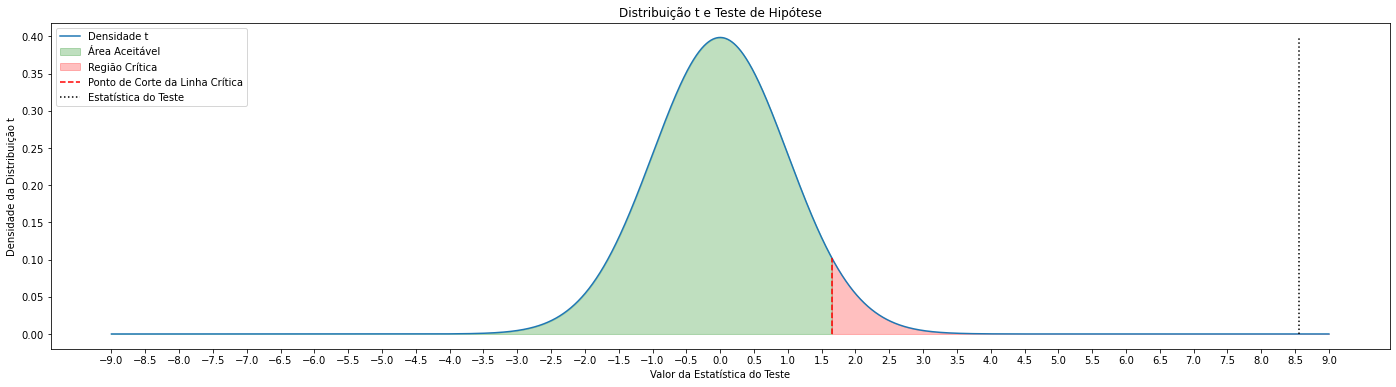

A probabilidade para valores entre 1,65 e inf é de 5,00%


In [7]:
# Representação gráfica do teste
fig, ax = plt.subplots(figsize=(24, 6))

# Parâmetros da densidade sob a hipótese nula
mu = 0 # média
variance = 1 # variância
sigma = variance**.5 # desvio padrão

# Valores de X e Y para plotar a densidade da distribuição t
x = np.linspace(np.floor(mu-(t_statistic*sigma)), np.ceil(mu+(t_statistic*sigma)), 100000)
y = stats.t.pdf(x, df)

# Gráfico da densidade
ax.plot(x, y, label='Densidade t')

# Região Crítica
low = stats.t.ppf(.95, df, loc=0, scale=1)
high = np.inf

# Área aceitável
ax.fill_between(x, y, where=(x<low), alpha=0.25, label='Área Aceitável', color='green')

# Área da região crítica
ax.fill_between(x, y, where=(x>low)&(x<high), alpha=0.25, label='Região Crítica', color='red')

# Linha vertical para o ponto crítico da linha crítica
ax.vlines(x=t_critical, ymin=y.min(), ymax=stats.t.pdf(t_critical, df), color='r', linestyle='--', label='Ponto de Corte da Linha Crítica')

# Linha vertical para a estatística do teste
ax.vlines(x=t_statistic, ymin=y.min(), ymax=y.max(), color='black', linestyle='dotted', label='Estatística do Teste')

# Ajustar a quantidade de marcas no eixo x
ax.set_xticks(np.arange(x.min(), x.max()+.5, .5))

# Legenda e rótulos
ax.legend(loc='upper left')
ax.set_title('Distribuição t e Teste de Hipótese')
ax.set_xlabel('Valor da Estatística do Teste')
ax.set_ylabel('Densidade da Distribuição t')

plt.show()

# Probabilidade de X pertencer à área
prob_area = stats.t.cdf(high, df) - stats.t.cdf(low, df)
print(f'A probabilidade para valores entre {low:.2f} e {high:.2f} é de {prob_area:.2%}'.replace('.',','))

## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [8]:
for specie in pg.species.unique():
    # Species
    print(f'\tEspécie: {specie}')
    
    # Definição das hipóteses nula e alternativa
    print('''
    Hipótese nula       H0: Peso dos machos <= Peso das fêmeas
    Hipótese alterativa H1: Peso dos machos >  Peso das fêmeas''')

    # Machos por espécie
    male = pg.loc[(pg.sex == 'Male') & (pg.species == specie), 'body_mass_g']
    n_male = len(male) # Tamanho das amostras
    mean_male = np.mean(male) # Média
    std_male = np.std(male, ddof=1) # Desvio padrão

    # Fêmeas por espécie
    female = pg.loc[(pg.sex == 'Female') & (pg.species == specie), 'body_mass_g']
    n_female = len(female) # Tamanho das amostras
    mean_female = np.mean(female) # Média
    std_female = np.std(female, ddof=1) # Desvio padrão

    # Diferença entre as médias
    mean_difference = mean_male - mean_female
    
    # Erro padrão
    std_error = np.sqrt((std_male**2/n_male) + (std_female**2/n_female))
    
    # Estatística t
    t_statistic = mean_difference / std_error

    # Graus de liberdade
    df = n_male+n_female-2

    # Valor crítico do teste t para um intervalo de confiança de 95%
    alpha = 0.05
    t_critical = stats.t.ppf(q=1-alpha, df=df) # q=95%

    # Valor-p para o teste t unilateral à direita
    p_value = 1-stats.t.cdf(x=t_statistic, df=df)

    # Apresentação dos resultados
    print(f'''
    Resultados:

    Diferença entre as médias: {mean_difference:.2f}
    Desvio padrão (Male): {std_male:.2f}
    Desvio padrão (Female): {std_female:.2f}
    Erro padrão: {std_error:.2f}
    Estatística do teste: {t_statistic:.2f}
    Graus de liberdade: {df}
    Região crítica: {t_critical:.2f}
    P-value: {p_value} ({p_value:.18f})
    ''')

    # Interpretação dos resultados
    if t_statistic > t_critical:
        print("Estatística do teste > Região crítica")
    else:
        print("Estatística do teste < Região crítica")

    if p_value < 0.05:
        print(f"P-value < 5% \n\n Rejeitar a hipótese nula. Há evidências de que o peso dos machos da espécie {specie} é significativamente maior que o peso das fêmeas.\n")
    else:
        print(f"P-value > 5% \n\n Não há evidências suficientes para rejeitar a hipótese nula. Não há diferença significativa no peso entre machos e fêmeas da espécie {specie}.\n")

	Espécie: Adelie

    Hipótese nula       H0: Peso dos machos <= Peso das fêmeas
    Hipótese alterativa H1: Peso dos machos >  Peso das fêmeas

    Resultados:

    Diferença entre as médias: 674.66
    Desvio padrão (Male): 346.81
    Desvio padrão (Female): 269.38
    Erro padrão: 51.40
    Estatística do teste: 13.13
    Graus de liberdade: 144
    Região crítica: 1.66
    P-value: 0.0 (0.000000000000000000)
    
Estatística do teste > Região crítica
P-value < 5% 

 Rejeitar a hipótese nula. Há evidências de que o peso dos machos da espécie Adelie é significativamente maior que o peso das fêmeas.

	Espécie: Chinstrap

    Hipótese nula       H0: Peso dos machos <= Peso das fêmeas
    Hipótese alterativa H1: Peso dos machos >  Peso das fêmeas

    Resultados:

    Diferença entre as médias: 411.76
    Desvio padrão (Male): 362.14
    Desvio padrão (Female): 285.33
    Erro padrão: 79.07
    Estatística do teste: 5.21
    Graus de liberdade: 66
    Região crítica: 1.67
    P-value: 1

In [9]:
# Utilizando statsmodels.stats.weightstats.ttest_ind

for specie in pg.species.unique():
    # Dados por espécie
    x1 = pg.loc[(pg['species'] == specie) & (pg['sex'] == 'Male'), 'body_mass_g']
    x2 = pg.loc[(pg['species'] == specie) & (pg['sex'] == 'Female'), 'body_mass_g']

    # Teste t
    t_statistic, p_value, degrees_of_freedom = ttest_ind(x1=x1, x2=x2, alternative='larger', usevar='unequal', value=0)

    # Resultados
    results = {
        'test statistic': t_statistic,
        'pvalue of the t-test': p_value,
        'degrees of freedom used in the t-test': degrees_of_freedom
    }

    # Apresentação dos resultados
    print(f"\tResultados para a espécie {specie}:\n")
    for label, value in results.items():
        print(f"{label}: {value:.18f}")

    # Interpretação dos resultados
    if p_value < 0.05:
        print("Rejeitar a hipótese nula. Há evidências de que o peso dos machos é significativamente maior que o peso das fêmeas.\n")
    else:
        print("Não há evidências suficientes para rejeitar a hipótese nula. Não há diferença significativa no peso entre machos e fêmeas.\n")

	Resultados para a espécie Adelie:

test statistic: 13.126285923485873752
pvalue of the t-test: 0.000000000000000000
degrees of freedom used in the t-test: 135.693578935303804656
Rejeitar a hipótese nula. Há evidências de que o peso dos machos é significativamente maior que o peso das fêmeas.

	Resultados para a espécie Chinstrap:

test statistic: 5.207733848992660342
pvalue of the t-test: 0.000001132215775733
degrees of freedom used in the t-test: 62.575105077219298266
Rejeitar a hipótese nula. Há evidências de que o peso dos machos é significativamente maior que o peso das fêmeas.

	Resultados para a espécie Gentoo:

test statistic: 14.761368414543289518
pvalue of the t-test: 0.000000000000000000
degrees of freedom used in the t-test: 116.643503775125921607
Rejeitar a hipótese nula. Há evidências de que o peso dos machos é significativamente maior que o peso das fêmeas.

